# Title: An inhomogeneous ensemble spins coupled to optical cavity 

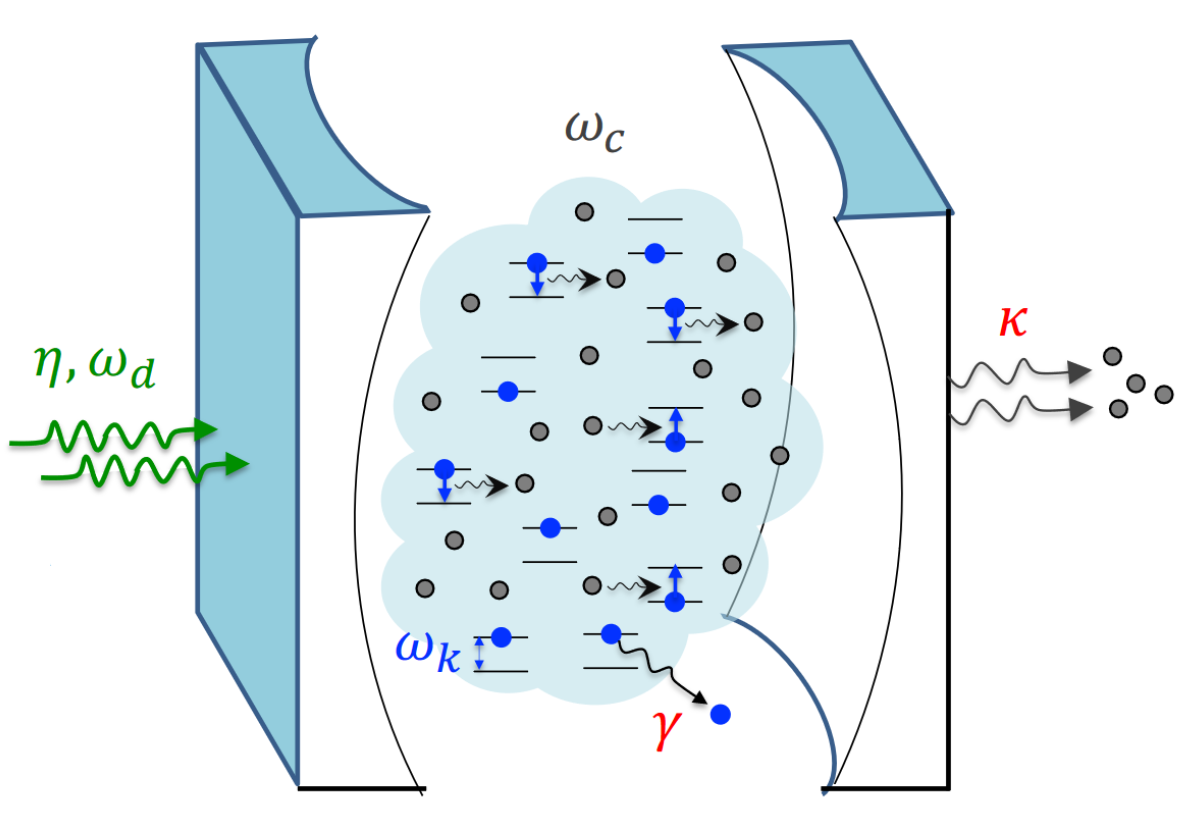

## The effective Hamiltonian

$$\mathcal{H}_{\text{eff}}=\omega_ca^\dagger a + \sum_{k=1}^{N}\omega_k\sigma_k^\dagger\sigma_k+\sum_{k=1}^{N}g_k\left(a^\dagger \sigma_k+\sigma_k^\dagger a\right)$$
Here, the atomic frequency distribution is taken to be Gaussian with a standara deviation $\delta$ and a mean $\omega_c$. For simplicity, the coupling is taken to be identical, i.e., $g_k=g,\forall k$.

## The system parameters

$$\Omega=g\sqrt{N}=3.5\text{MHz},\delta=1\text{MHz},\kappa=0.1\text{MHz},\gamma=10^{-4}\text{HMz}$$

In [1]:
from qcs_phy import qcs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# system fixed parameters
ωc = 0
κ=0.1
γ=1e-4
δ=1
Ω=3.5

Nlist = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
ωd = np.linspace(-5, 5, 1000)

In [4]:
Tlist = []
for N in Nlist:
    ωk = np.random.normal(loc=0.0, scale=δ, size=N)
    # construct Input and Output channels
    mode_c = [np.sqrt(κ/2), ("a", 0)]
    Input = qcs.Input_channel("b", mode_c, ωd)
    Output = qcs.Output_channel("c", mode_c)
    # construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
    Heff = []
    Heff.append([(ωc-1j*κ/2), ("ad", 0), ("a", 0)])
    for k in range(N):
        Heff.append([(ωk[k]-1j*γ/2), ("sp", k), ("sm", k)])
        Heff.append([Ω/np.sqrt(N), ("ad", 0), ("sm", k)])
        Heff.append([Ω/np.sqrt(N), ("a", 0), ("sp", k)])
    result = qcs(Heff, Input, Output)
    Tlist.append(result.calculate_quantity("c")) 
    print("N = %s"%N)

N = 10
N = 50
N = 100
N = 150
N = 200
N = 250
N = 300
N = 350
N = 400
N = 450
N = 500
N = 550
N = 600
N = 650
N = 700
N = 750
N = 800
N = 850
N = 900
N = 950
N = 1000


<IPython.core.display.Javascript object>


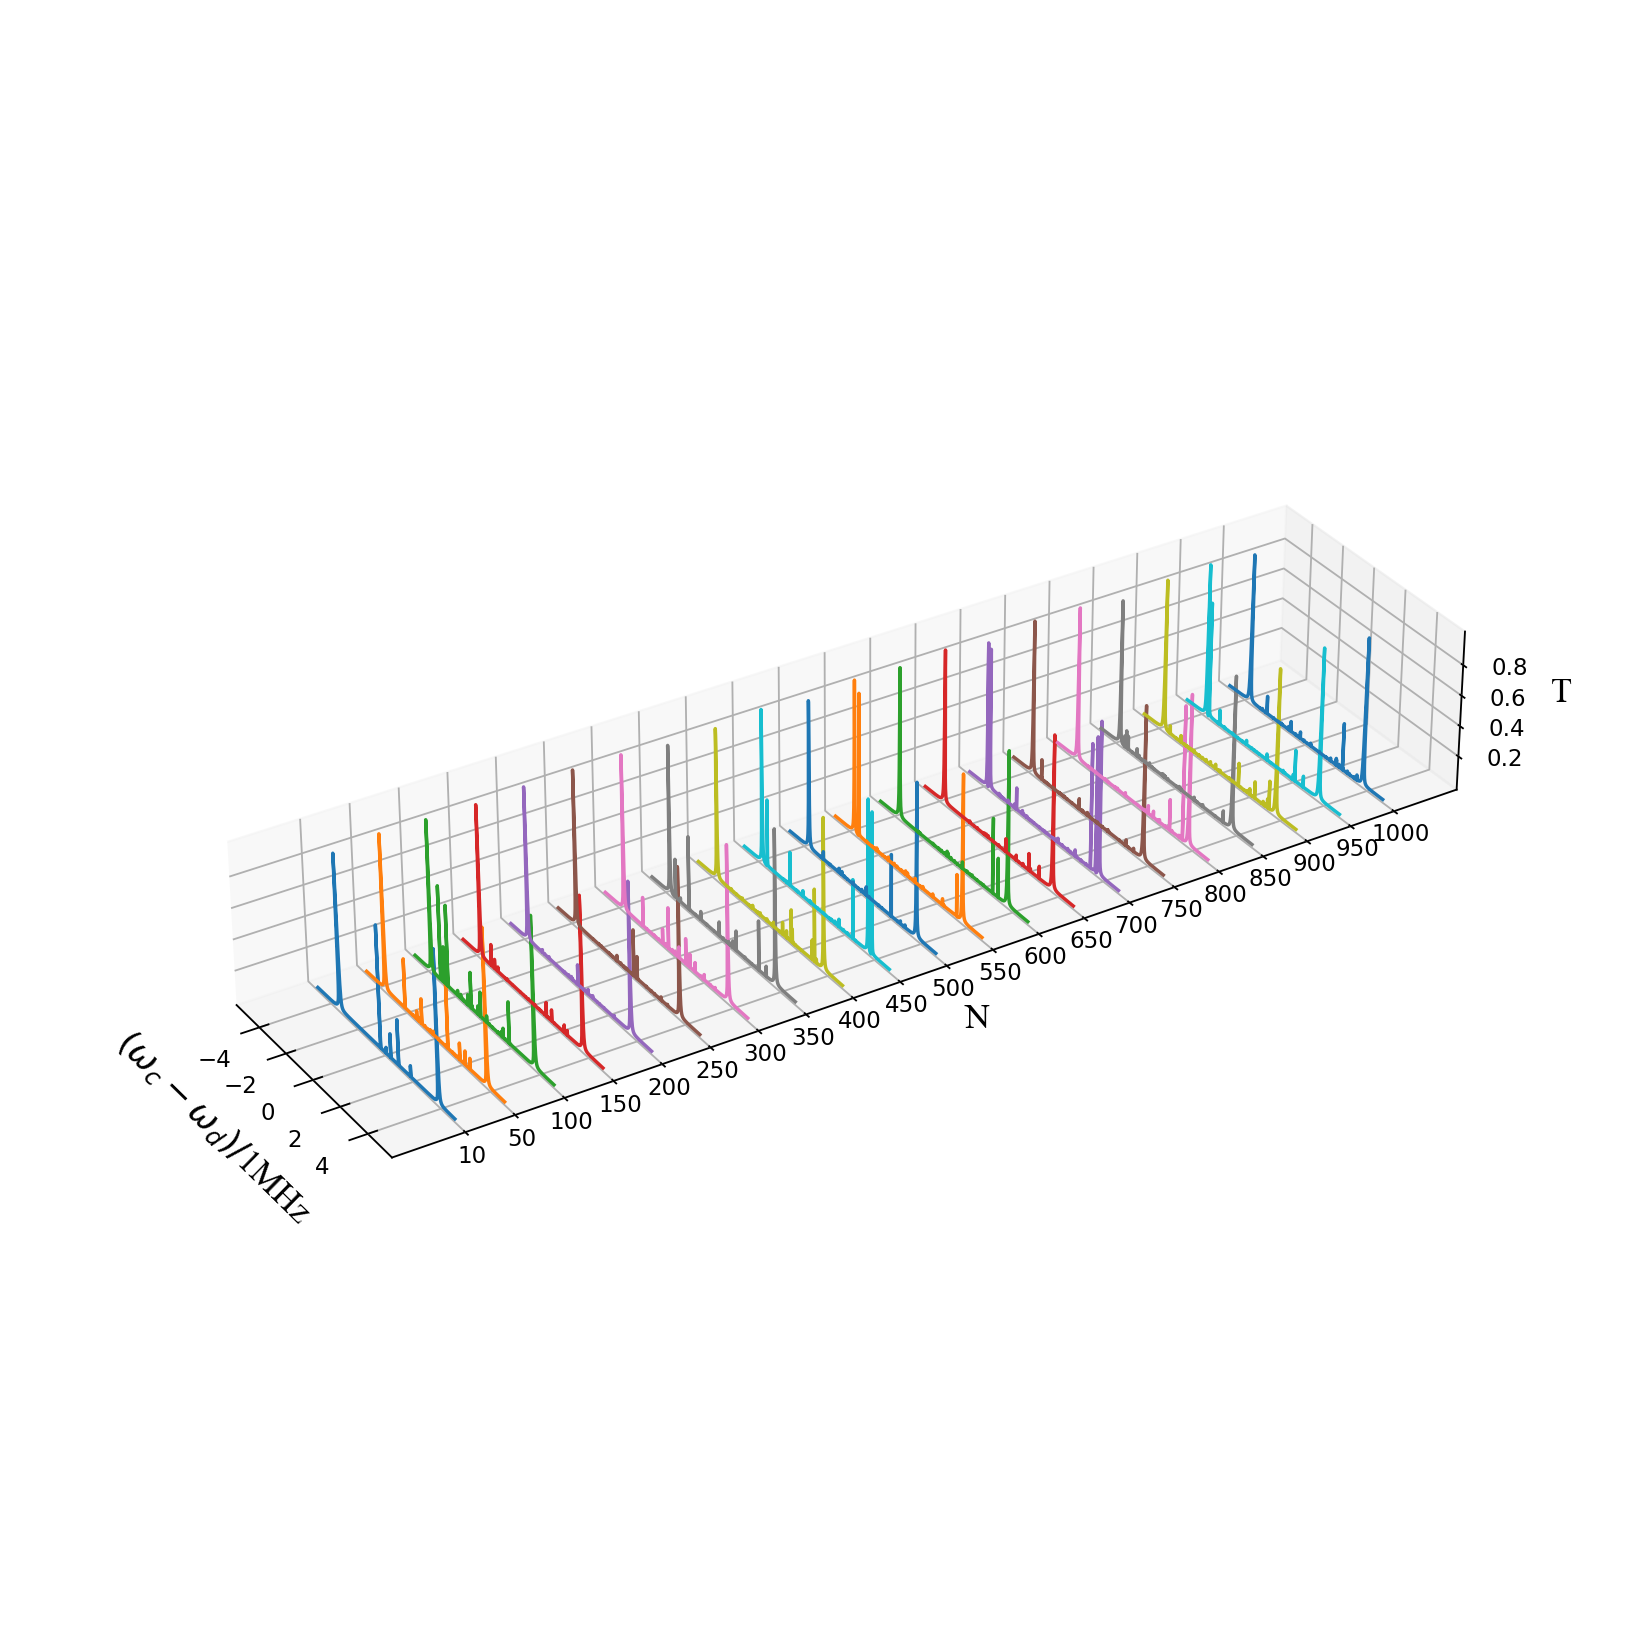

In [42]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')


y_k = np.ones((len(ωd)))

for kk in range(len(Nlist)):
    ax.plot3D(ωd, y_k * kk,Tlist[kk])
    ax.set_xlabel(r'$(\omega_c-\omega_d)/$1MHz', fontdict={"family": "Times New Roman", "size": 15})
ax.set_ylabel('N',labelpad=30, fontdict={"family": "Times New Roman", "size": 15})
ax.set_zlabel(r'T', fontdict={"family": "Times New Roman", "size": 15})
ax.set_yticks([kk for kk in range(len(Nlist))], Nlist)
plt.gca().set_box_aspect((10,40,6))
plt.show()

For $N\to∞$, we can obtain the analytical solution of transmission spectrum, and the details see in PRA 84, 063810.